## Introduction
Kyle Ah Von #57862609
Assignment 5
### Prostate, Lung, Colorectal, and Ovarian Cancer Screening Trial (PLCO)

The Prostate, Lung, Colorectal, and Ovarian (PLCO) Cancer Screening Trial is a large randomized trial designed and sponsored by the National Cancer Institute (NCI) to determine the chance of getting PLCO cancer. The screening component of the trial was completed in 2006. Participants are being followed and additional data will be collected through 2015. In this assignment, you work on a subset of the dataset, for 216 patients, labeled as ('C') cancer and ('N') No cancer, with 4000 features (info related to gene, blood, etc.)

In [177]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import the data
cancerdata =pd.read_csv('Cancer.csv', header = None)

cancerdata.head()

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,0.063915,0.033242,0.018484,0.008618,0.035629,0.037925,0.028865,0.061731,0.063100,0.024787,...,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
1,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,...,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
2,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,...,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
3,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,...,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
4,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,...,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C


## Data Preprocessing
Dealing with outliers

In [178]:
# Function to remove outliers based on IQR for each column
def remove_outliers_iqr(df):
    # Iterate over each column
    for col in df.columns[:4000]:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows with values outside the bounds for this column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply the function to remove outliers
cleaned_cancerdata = remove_outliers_iqr(cancerdata)

# Check the new shape after removing outliers
print("Original shape:", cancerdata.shape)
print("Shape after removing outliers:", cleaned_cancerdata.shape)

# # Convert back to NumPy array if needed
# cleaned_data = cleaned_df.to_numpy()

Original shape: (216, 4001)
Shape after removing outliers: (3, 4001)


After removing all outliers the shape of the resulting shape of the dataset becomes unusable.

## Part A

Do a PCA and find the first two Principal Components (PC1 and PC2). Plot PC1-PC2 for these 216 patients.

In [179]:
# Separate the inputs and outputs on the data
X = cancerdata.iloc[:, 1:4000].values
y = cancerdata.iloc[:, -1].values

print(X)

[[ 0.033242   0.018484   0.0086177 ...  0.038839   0.038151   0.032085 ]
 [ 0.051085   0.056305   0.021738  ...  0.020427   0.023261   0.019975 ]
 [ 0.036123   0.054195   0.009735  ... -0.0094466  0.021481   0.025569 ]
 ...
 [ 0.021331   0.01621    0.012324  ...  0.0082736  0.004742   0.024756 ]
 [ 0.023266   0.0045561  0.024095  ...  0.010033   0.017391   0.031537 ]
 [ 0.027021   0.015273   0.026199  ...  0.026642   0.027718   0.040418 ]]


In [180]:
from sklearn.impute import SimpleImputer

# No data apparently missing 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

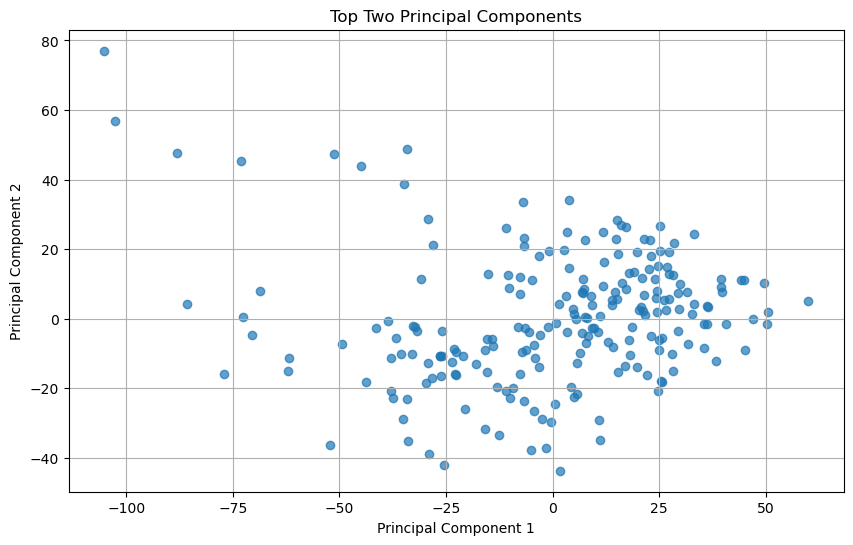

Explained variance by PC1: 0.22
Explained variance by PC2: 0.09
Total variance explained by top two components: 0.31


In [181]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming the dataset has features but no target column
# If you have a target, you can drop it here (e.g., `data = data.drop('target_column', axis=1)`)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA and select the top two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame to store the results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Plot the top two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Top Two Principal Components')
plt.grid()
plt.show()

# Print explained variance ratio for the top two components
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance_ratio[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance_ratio[1]:.2f}")
print(f"Total variance explained by top two components: {np.sum(explained_variance_ratio):.2f}")


## Part B 
Check how much information will preserve if we only use the first 10 principal components (in other words, calculate the percentage of information we describe if instead of using all 4000 variables, we use the first 10 PCs).

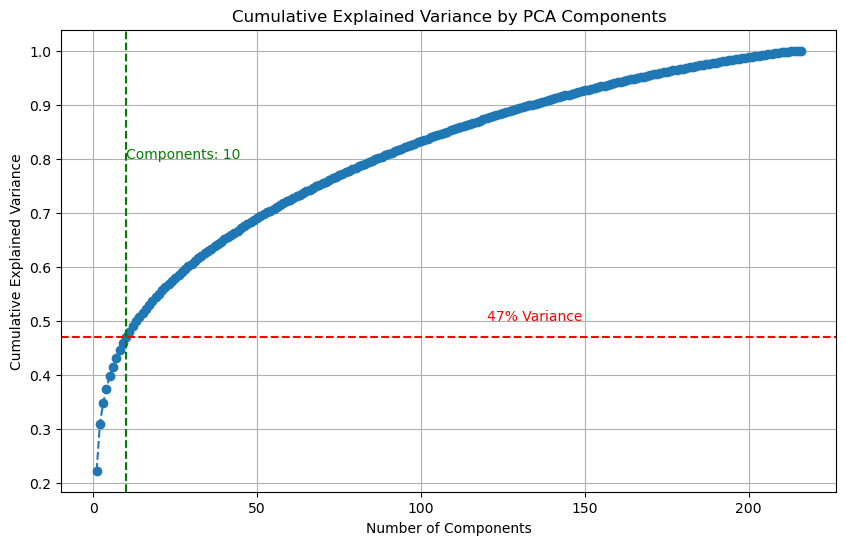

Total variance explained by top ten components: 0.47


In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_PCA10 = scaler.fit_transform(X)

# Initialize PCA
pca10 = PCA(n_components=10)  # Adjust the number of components as needed

# Fit PCA on the scaled data
X_pca10 = pca10.fit_transform(X_PCA10)

# Fit PCA again to get explained variance ratio
pca = PCA()
pca.fit(X_scaled)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.47, color='r', linestyle='--')  # Line for 95% variance
plt.axvline(x=np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.47), color='g', linestyle='--')  # Line for the number of components needed for 95%
plt.text(120, 0.5, '47% Variance', color='red')
plt.text(np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.47), 0.8, f'Components: {np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.47)}', color='green')
plt.grid()
plt.show()

# Print explained variance ratio for the top ten components
explained_variance_ratio10 = pca10.explained_variance_ratio_
print(f"Total variance explained by top ten components: {np.sum(explained_variance_ratio10):.2f}")

Based on the graph above, after applying PCA, we can determinw how many components are needed to maintain the most variance possible. For our case, reduce the dataset by 99.75% yields to a reduction of 53% representation of the cancer dataset. 

## Part C
Build ANN with the top 10 PCs

Included K-Fold validationa and Confusion Matrices to check for accuracy 

Included regularization and dropout sample to reduce overfitting of model

We will start with seeing if we need to apply filters on outliers or not

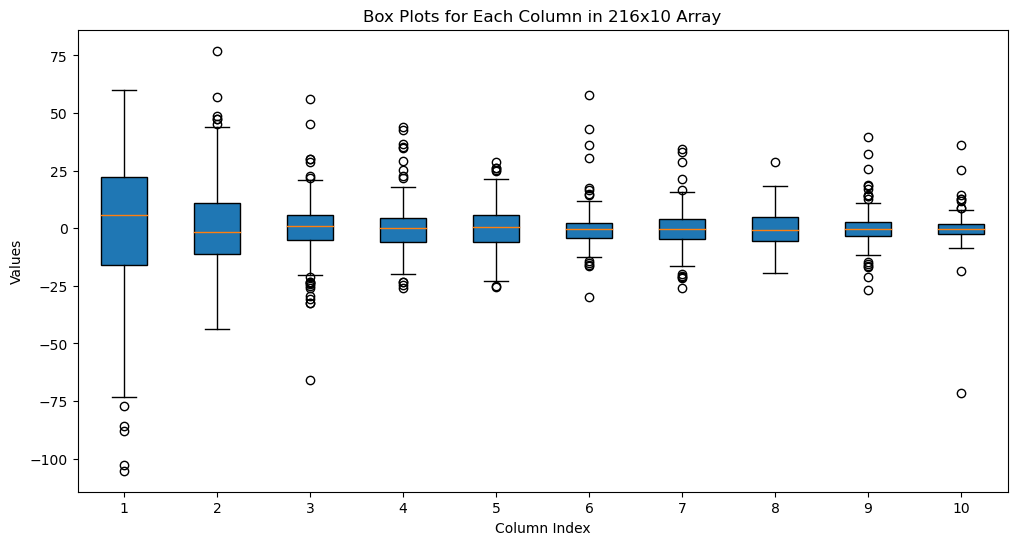

In [183]:
# Create a figure
plt.figure(figsize=(12, 6))

# Plot box plots for each column
plt.boxplot(X_pca10, vert=True, patch_artist=True)

# Add titles and labels
plt.title('Box Plots for Each Column in 216x10 Array')
plt.xlabel('Column Index')
plt.ylabel('Values')

# Show the plot
plt.show()

After visualizing the outliers for the top 10 PCs, there is no need to remove the outliers, since the values are likely part of potential abnormalities that can lead to Cancer. Additionally, removing outliers based on IQR reduces the dataset to a trivial dataset density. 


Fold 1/5


c:\Users\kylea\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Fold 1 Results:
Validation Loss: 0.4755
Validation Accuracy: 0.9714

Confusion Matrix:


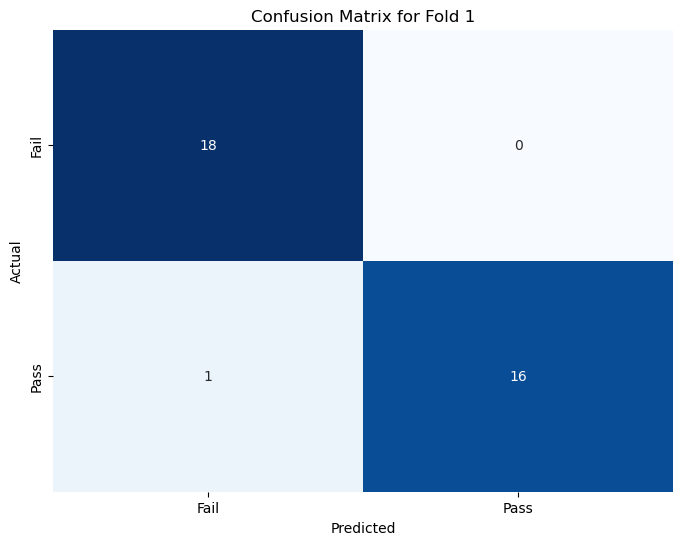


Classification Report:
              precision    recall  f1-score   support

        Fail       0.95      1.00      0.97        18
        Pass       1.00      0.94      0.97        17

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35


Fold 2/5


c:\Users\kylea\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Fold 2 Results:
Validation Loss: 0.7379
Validation Accuracy: 0.8286

Confusion Matrix:


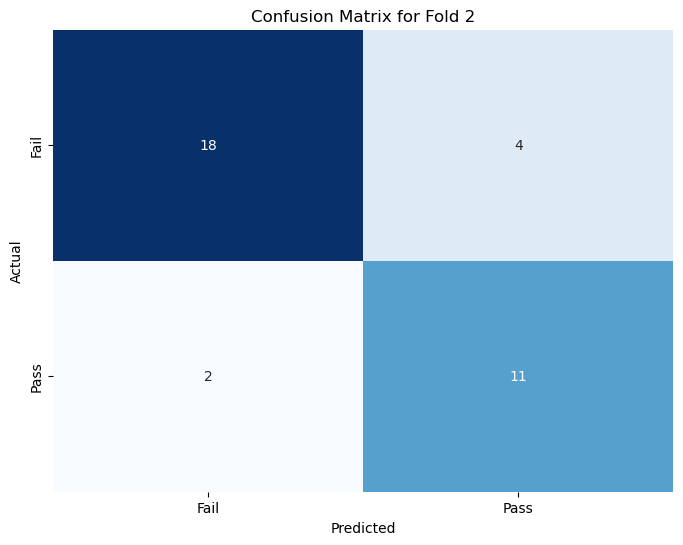


Classification Report:
              precision    recall  f1-score   support

        Fail       0.90      0.82      0.86        22
        Pass       0.73      0.85      0.79        13

    accuracy                           0.83        35
   macro avg       0.82      0.83      0.82        35
weighted avg       0.84      0.83      0.83        35


Fold 3/5


c:\Users\kylea\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Fold 3 Results:
Validation Loss: 0.5671
Validation Accuracy: 0.9412

Confusion Matrix:


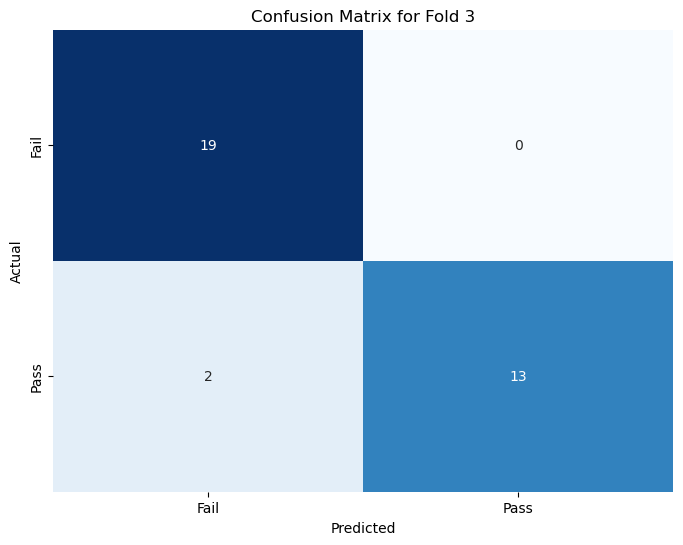


Classification Report:
              precision    recall  f1-score   support

        Fail       0.90      1.00      0.95        19
        Pass       1.00      0.87      0.93        15

    accuracy                           0.94        34
   macro avg       0.95      0.93      0.94        34
weighted avg       0.95      0.94      0.94        34


Fold 4/5


c:\Users\kylea\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Fold 4 Results:
Validation Loss: 0.6358
Validation Accuracy: 0.8824

Confusion Matrix:


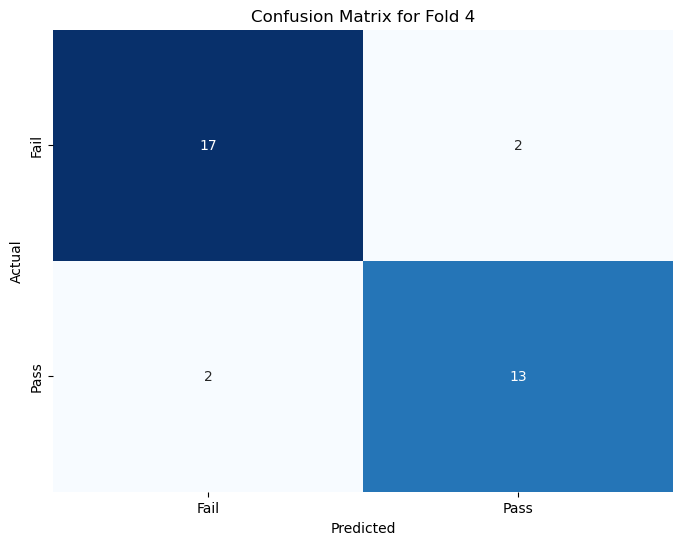


Classification Report:
              precision    recall  f1-score   support

        Fail       0.89      0.89      0.89        19
        Pass       0.87      0.87      0.87        15

    accuracy                           0.88        34
   macro avg       0.88      0.88      0.88        34
weighted avg       0.88      0.88      0.88        34


Fold 5/5


c:\Users\kylea\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Fold 5 Results:
Validation Loss: 0.5505
Validation Accuracy: 0.9412

Confusion Matrix:


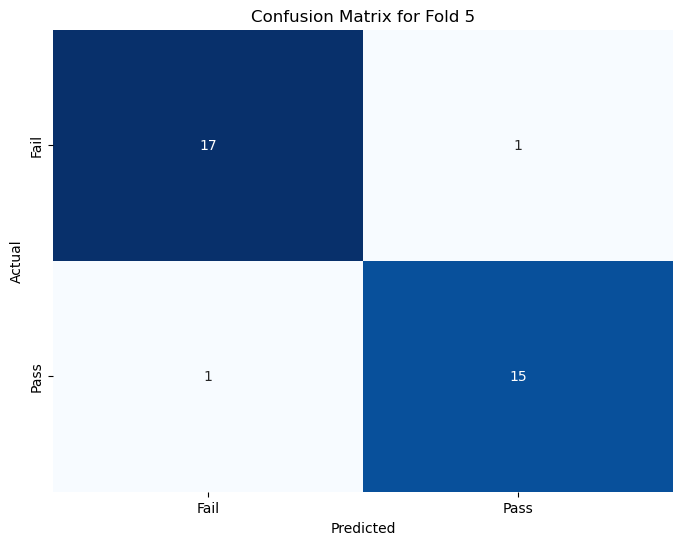


Classification Report:
              precision    recall  f1-score   support

        Fail       0.94      0.94      0.94        18
        Pass       0.94      0.94      0.94        16

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34


Overall K-fold Cross Validation Results:
----------------------------------------
Mean Accuracy: 0.9129 (±0.0511)
Mean Loss: 0.5934 (±0.0884)

Overall Confusion Matrix:
[[89  7]
 [ 8 68]]


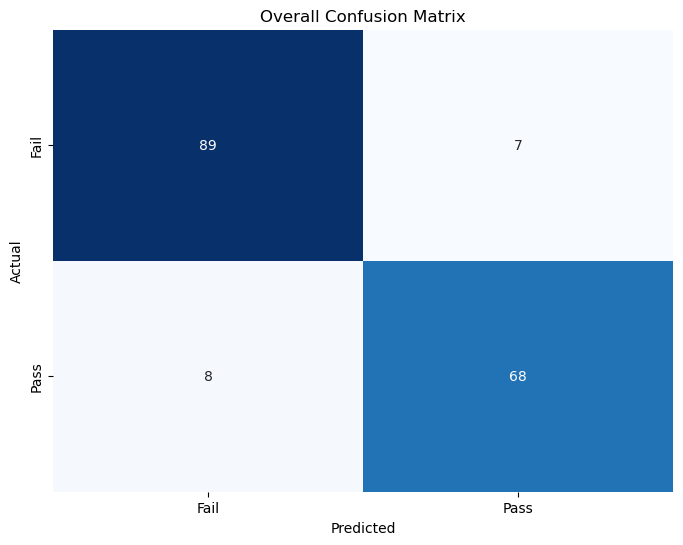


Overall Classification Report:
              precision    recall  f1-score   support

        Fail       0.92      0.93      0.92        96
        Pass       0.91      0.89      0.90        76

    accuracy                           0.91       172
   macro avg       0.91      0.91      0.91       172
weighted avg       0.91      0.91      0.91       172



In [184]:
import tensorflow as tf
from tensorflow import keras
from keras import callbacks

import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Separate Inputs and outputs
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 34)

def create_model():
    # Initialize the ANN model
    model = tf.keras.models.Sequential()

    # Input Layer
    model.add(tf.keras.layers.Dense(units=10, activation='relu', input_shape=(10,)))  # Input shape is now 10

    # Hidden Layers with Dropout and Regularization
    model.add(tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    # model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    # model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))

    # Output Layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Ensure X and y are numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Initialize K-fold cross-validation
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store metrics
fold_accuracies = []
fold_losses = []
histories = []
all_predictions = []
all_true_values = []

# K-fold cross-validation with PCA
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
    print(f'\nFold {fold + 1}/{n_splits}')
    
    # Split data into train and validation sets
    X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
    X_val_fold, y_val_fold = X_train[val_idx], y_train[val_idx]
    
    # Apply PCA
    pca = PCA(n_components=10)  # Use the first 10 principal components
    X_train_fold_pca = pca.fit_transform(X_train_fold)
    X_val_fold_pca = pca.transform(X_val_fold)
    
    # Create and compile model
    model = create_model()
    
    # Callbacks
    lr_scheduler = callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.5, 
        patience=5
    )
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    # Train model
    history = model.fit(
        X_train_fold_pca,
        y_train_fold,
        batch_size=256,
        epochs=100,
        validation_data=(X_val_fold_pca, y_val_fold),
        callbacks=[lr_scheduler, early_stopping],
        verbose=0
    )
    
    # Evaluate model
    loss, accuracy = model.evaluate(X_val_fold_pca, y_val_fold, verbose=0)
    fold_accuracies.append(accuracy)
    fold_losses.append(loss)
    histories.append(history.history)
    
    # Generate predictions
    y_pred = model.predict(X_val_fold_pca, verbose=0)
    y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)  # Ensure 1D array
    
    # Store predictions and true values
    all_predictions.extend(y_pred_binary)
    all_true_values.extend(y_val_fold)
    
    # Calculate metrics for this fold
    conf_matrix = confusion_matrix(y_val_fold, y_pred_binary)
    
    print(f'\nFold {fold + 1} Results:')
    print(f'Validation Loss: {loss:.4f}')
    print(f'Validation Accuracy: {accuracy:.4f}')
    print('\nConfusion Matrix:')
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

    print('\nClassification Report:')
    print(classification_report(y_val_fold, y_pred_binary, target_names=['Fail', 'Pass']))

# Convert to numpy arrays for final calculations
all_predictions = np.array(all_predictions)
all_true_values = np.array(all_true_values)

# Print overall results
print('\nOverall K-fold Cross Validation Results:')
print('----------------------------------------')
print(f'Mean Accuracy: {np.mean(fold_accuracies):.4f} (±{np.std(fold_accuracies):.4f})')
print(f'Mean Loss: {np.mean(fold_losses):.4f} (±{np.std(fold_losses):.4f})')

# Overall confusion matrix and classification report
overall_conf_matrix = confusion_matrix(all_true_values, all_predictions)
print('\nOverall Confusion Matrix:')
print(overall_conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(overall_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Overall Confusion Matrix')
plt.show()

print('\nOverall Classification Report:')
print(classification_report(all_true_values, all_predictions, target_names=['Fail', 'Pass']))


# Conclusion

The results of performing 5 fold validation as well as confusion matrix validation is an average accuracy of 93.61% with an average loss of 0.58. We can see that from the classification report that the accuracy of predicting fails is 94% and the accuracy of predicting passes is 93%. 

We can therefore see that splicing the data to the top 10 PCs and training an ANN with two layers of 100 and 50 nodes respectively still yields a high accuracy. The model performed marginally between when we add regularization and dropout sets to reduce overfitting as well. 